# People Analytics
## Predicting Employee Attrition with R

<img src="images/office-and-workers-in-barcelona-spain.jpg" />

<br>

*In this notebook, we will walk through solving a classification problem using machine learning. To do so, we will introduce the Scikit-Learn machine learning library for Python.*

### Table of Contents

<a href="#sectioncase">Case Study: Employee Attrition at IBM</a>

<a href="#sectiondata"> The Dataset </a>

<a href="#sectionlogistic"> Logistic Regression </a>

<ul>
    <li> <a href="#sectionex1">Example 1: Predicting Based on Monthly Income </a> </li>
    <li> <a href="#sectionex2">Example 2: Predicting Based on Monthly Income, Work-Life Balance, and Years at Company</a> </li>
    <li> <a href="#sectionmake">Make Your Own Model</a></li>
    </ul>


## <a id= "sectioncase">Case Study: Employee Attrition at IBM </a>

*Employee attrition* refers to a decrease in employees at a company where the company does not intend to fill the vacancy afterward. Attrition, caused by resignations, retirements, or the elimination of job positions, is important for businesses to anticipate so they can keep costs low and properly distribute workloads.

Today, we'll try to predict whether or not an employee will leave their job using [a data set created by IBM](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home). Because employee data is confidential, IBM's data set is fictional- it does not represent real employees. However, the data and the problem are structured very similarly to how actual companies such as IBM are approaching this very real problem.

<div class="alert alert-info">
    <b>NOTE</b>: we've made some changes to the data set to make this assignment simpler- things like renaming values, dropping confusing features, and adding definitions for columns. Please refer to the data dictionary below and <b>not</b> the one at the link when completing this assignment.
    </div>


The code in the next cell loads the *dependencies* (necessary software) that we'll need in order to run the analysis. **Make sure to run the following cell**; if you don't, the rest of the notebook may not work correctly.

In [1]:
# load software used in the notebook
install.packages("corrplot")
library(corrplot)
library(ggplot2)
install.packages("plyr")
library(plyr)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## <a name="sectiondata"> The Dataset </a>


Run the following cell to load the data.

In [2]:
# load the dataset
hr = read.csv("data/HR-Employee-Attrition.csv")

# show the first 6 rows of the dataset
head(hr)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


This data set contains a wealth of information that could be used to predict attrition. In fact, there is so much information that the rows and columns have been truncated in the notebook.

The `dim` function is short for *dimensions*. It shows us two numbers: the number of rows followed by the number of columns in the dataset. Each row represents a single employee at the company; each column represents a feature about employees, such as their age or the department they work in.

In [3]:
# show the size of the dataset
dim(hr)

[1] 1470   35

And we can view all of the column names by using the `names` function.

In [4]:
# view all column names
names(hr)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

The source website included the **data dictionary**: the information about each feature (column) contained in the data set. We've reproduced the data dictionary here.


* `Age`: employee's age
* `Attrition`: the **response variable**. 1 if employee left IBM due to normal life circumstances, 0 if the employee stayed with IBM
* `BusinessTravel`: the amount of travel the employee does for business. 0 (no travel), 1 (rare travel), or 2 (frequent travel)
* `Department`: employee's home department. 'Sales', 'Research & Development', or 'Human Resources'
* `DistanceFromHome`: number of miles the employee has to travel to work
* `Education`: employee's highest level of education. 1 (below college), 2 (some college), 3 (bachelor's degree), 4 (master's degree), 5 (doctorate)
* `Gender`: 1 (female) or 0 (male)
* `JobRole`: 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', or 'Human Resources'
* `JobSatisfaction`: the employee's ranking of their satisfaction with their job. Minimum is 1, maximum is 4.
* `MaritalStatus`: 'Single', 'Married', or 'Divorced'
* `MonthlyIncome`: in dollars
* `NumCompaniesWorked`: the total number of companies the employee has worked at in their lifetime
* `OverTime`: whether or not the employee is eligible for overtime. 1 (yes) or 0 (no)
* `PercentSalaryHike`: for the employee's most recent salary increase, the percentage by which their salary increased
* `WorkLifeBalance`: employee's rating of their work-life balance. 1 (bad), 2 (good), 3 (better), 4 (best)
* `YearsAtCompany`: number of years employee has worked for IBM
* `YearsInCurrentRole`: number of years employee has worked for IBM in their current position

### Exploratory Analysis

**Exploratory Data Analysis (EDA)** can help us get a sense of what data each column contains.

The `summary` function displays summary statistics for each column. For **quantitative variables**, `summary` will show the minimum, maximum, mean, and quartiles. For **categorical variables**, `summary` shows the possible values and frequencies for each.

In [5]:
# show summary statistics for the data
summary(hr)

      Age        Attrition            BusinessTravel   DailyRate     
 Min.   :18.00   No :1233   Non-Travel       : 150   Min.   : 102.0  
 1st Qu.:30.00   Yes: 237   Travel_Frequently: 277   1st Qu.: 465.0  
 Median :36.00              Travel_Rarely    :1043   Median : 802.0  
 Mean   :36.92                                       Mean   : 802.5  
 3rd Qu.:43.00                                       3rd Qu.:1157.0  
 Max.   :60.00                                       Max.   :1499.0  
                                                                     
                  Department  DistanceFromHome   Education    
 Human Resources       : 63   Min.   : 1.000   Min.   :1.000  
 Research & Development:961   1st Qu.: 2.000   1st Qu.:2.000  
 Sales                 :446   Median : 7.000   Median :3.000  
                              Mean   : 9.193   Mean   :2.913  
                              3rd Qu.:14.000   3rd Qu.:4.000  
                              Max.   :29.000   Max.   :5.000  

**Data visualization** can also be helpful to find relationships. Box plots can show the distribution of values within a particular column of numerical data. Correlation plots show the strength of linear relationships between variables.

In [15]:
# add a data frame column with Attrition coded as integers: 1 for "Yes" and 0 for "No"
# this will allow us to make plots
hr$AttritionInt = as.integer(hr$Attrition) - 1

# select only columns with numeric data
numeric_data = hr[,sapply(hr,is.numeric)]
head(numeric_data)

Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,⋯,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionInt
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
41,1102,1,2,1,1,2,94,3,2,⋯,80,0,8,0,1,6,4,0,5,1
49,279,8,1,1,2,3,61,2,2,⋯,80,1,10,3,3,10,7,1,7,0
37,1373,2,2,1,4,4,92,2,1,⋯,80,0,7,3,3,0,0,0,0,1
33,1392,3,4,1,5,4,56,3,1,⋯,80,0,8,3,3,8,7,3,0,0
27,591,2,1,1,7,1,40,3,1,⋯,80,1,6,3,3,2,2,2,2,0
32,1005,2,2,1,8,4,79,3,1,⋯,80,0,8,2,2,7,7,3,6,0


In [8]:
# replace the ... with the name of the column you want to visualize
# capitalization counts!
my_column = "..."

# run this cell to see the distribution of values for your column
boxplot(hr[,my_column])

ERROR: Error in `[.data.frame`(hr, , my_column): undefined columns selected


Warning message in cor(numeric_data):
“the standard deviation is zero”

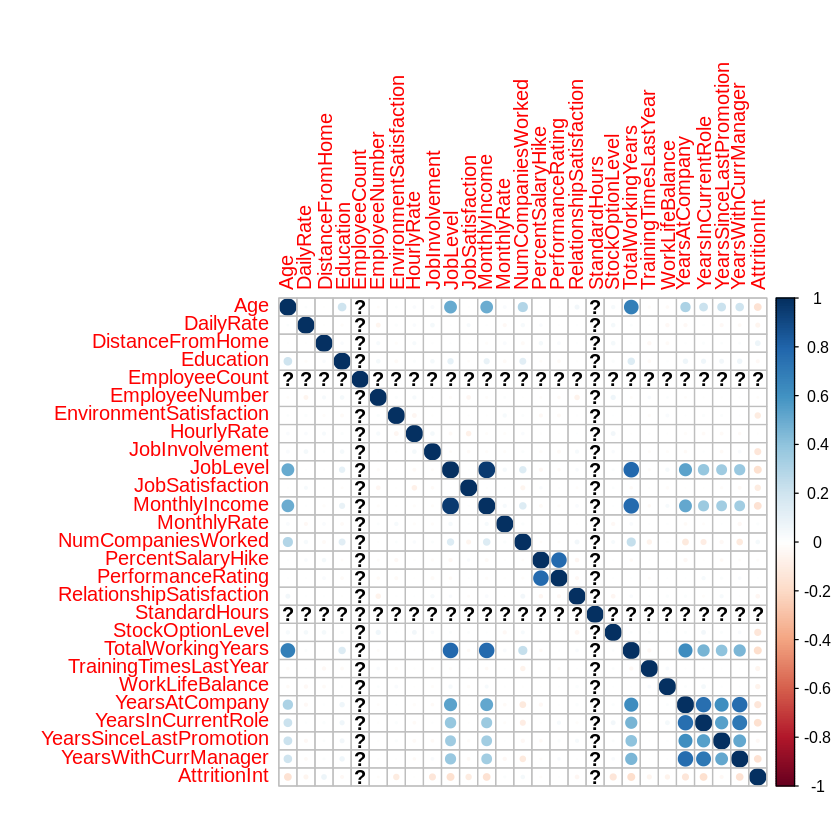

In [16]:
# create a correlation plot for quantitative variables
correlations = cor(numeric_data)
corrplot(correlations, method="circle")

<div class="alert alert-warning">
    <b>QUESTION</b>: TODO: add discussion question. Examples: which variables do you think will be most useful to predict attrition, and what do you base that on (EDA, prior knowledge, etc)? Do you see any outliers? Based on the data dictionary and your own knowledge, what are some possible sources of bias in the dataset that might affect this analysis?
    </div>


*YOUR ANSWER HERE*

## <a class="sectionlogistic"> Logistic Regression </a>

TODO: overview of logistic regression

### <a class="sectionex1"> Example 1: predict by monthly income rate (univariate logistic regression) </a>

Let's try predicting attrition based on the employee's monthly income.

The first task is to write out the formula and save it as a variable. In this example, the name of the formula variable is `univar_formula`. The formula itself is to the right of the `=` and has the syntax:

$$ \text{response_variable} \sim\text{predictor_variable}$$

That is, the name of the variable we want to predict is on the left of the tilde, and the name of the variable we're using to predict attrition is on the right.

In [17]:
# write the formula for univariate logistic regression
univar_formula = AttritionInt ~ MonthlyIncome

R provides a function called `glm` (for Generalized Linear Model) that will fit the data. The function takes three arguments:
* the formula (symbolic description of the model)
* `data` = the name of the data frame that holds our data
* `family` = a description of the error distribution and link function to be used in the model. For logistic regression, we want `binomial`

Run the following cell to fit the model.

In [18]:
# fit the model
logreg_single = glm(univar_formula, 
              data = hr, # the dataset
              family = binomial) # the type of model to use

Using the `summary` function, we can view some information about the fit model.

TODO: add preferred definitions and notes on what you want students to focus on.

In [19]:
# show some summary information about the fit model
summary(logreg_single)


Call:
glm(formula = univar_formula, family = binomial, data = hr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7704  -0.6646  -0.5811  -0.3430   2.6399  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -9.291e-01  1.292e-01  -7.191 6.43e-13 ***
MonthlyIncome -1.271e-04  2.162e-05  -5.879 4.12e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1298.6  on 1469  degrees of freedom
Residual deviance: 1253.1  on 1468  degrees of freedom
AIC: 1257.1

Number of Fisher Scoring iterations: 5


The `predict` function makes predictions using our fitted model. It has two arguments:
* the fitted logistic regression model
* `type` = the format of our predictions. By selecting "response", we will get back a probability between 0 (i.e. no predicted chance of attrition) and 1 (100% predicted chance of attrition)

In [20]:
# use the model to predict attrition
single_probs = predict(logreg_single, hr, type = "response")

# show the probabilities of attrition for the first six employees in the dataset
head(single_probs)

1         2         3         4         5         6 
0.1556649 0.1706322 0.2324093 0.2143578 0.2026350 0.2109740

We can view the range of predicted probabilities with a box plot. 

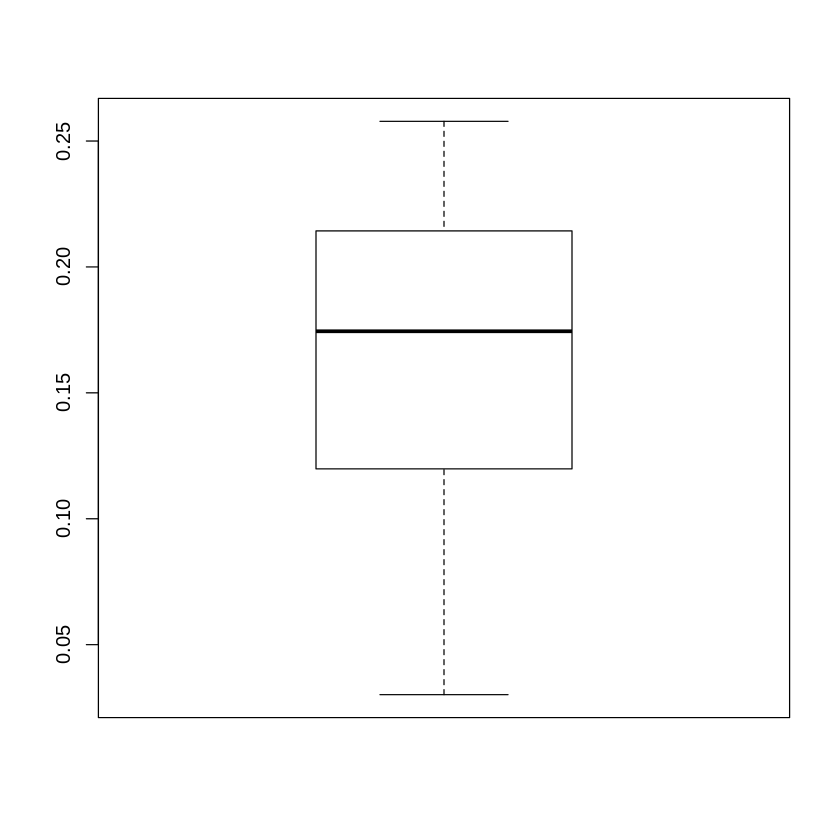

In [21]:
# show the range of predictions
boxplot(single_probs)

Having a predicted probability is interesting, but ideally we want our predictions to be in the same form as our original `Attrition` variable: either "Yes" or "No" values. This allows us to directly measure the accuracy of our model by comparing our predictions with the true outcomes. It also allows us to make HR decisions. 

There are a few ways to transform our probabilities into "Yes"/"No" values:

- We might decide that any probablity above a certain threshold will be coded as "Yes". For example, if the predicted probability is at least 0.24, we would predict attrition.
- If we believe that a certain proportion of staff are likely to leave the company, we might decide to code the top $n$ percent of predictions as "Yes". For example, if we know that last year we lost 5% of employees to attrition, we could predict attrition this year for the 5% of employees with the highest predicted probability.

<div class="alert alert-warning">
    <b>QUESTION</b>: What method do you think is best for interpreting the probabilities, and why? You may suggest a different method from the two listed above.
    </div>


*YOUR ANSWER HERE*

In this example, we'll try coding any employee with a probability of at least 0.22 as likely to leave.

In [22]:
# create a categorical variable: "Yes" if probability of attrition is > 0.23, "Yes" otherwise
single_preds = ifelse(single_probs > 0.22, "Yes", "No")

# show the first six items in the probability and prediction vectors for our single variable model
head(data.frame(single_probs, single_preds))

single_probs,single_preds
<dbl>,<fct>
0.1556649,No
0.1706322,No
0.2324093,Yes
0.2143578,No
0.2026350,No
0.2109740,No


One way to check our accuracy is to calculate how many predictions were correct out of the total number of predictions. This will take two steps:
1. for each prediction, check if it equals the actual value (`single_preds == hr[, "Attrition"]`)
2. add up the number of correct predictions and divide it by the total predictions (`mean`)

The resulting number is the proportion of correct predictions.

In [23]:
# show the proportion of correct predictions
mean(single_preds == hr[, "Attrition"])

[1] 0.7693878

It can also be useful to see in what ways our model is correct or incorrect. We can visualize this with a **confusion matrix**. Each row shows the instances of the predicted attrition, and each column shows the instances of the actual attrition. The matrix values are the counts. So:
- the value in row one, column one is the *true negatives*: the number of employees who were predicted to stay at the company and actually did stay
- the value in row one, column two is the *false negatives*: number of employees who were predicted to stay and actually left 
- the value in row two, column one is the *false positives*: employees who were predicted to leave but didn't
- the value in row two, column two is the *true positives*: employees who were predicted to leave and did

<img src="images/confusion-matrix.jpg" />

In [24]:
# create a confusion matrix for our predictions (rows) vs the actual values (columns)
table(single_preds, hr[, "Attrition"])


            
single_preds   No  Yes
         No  1045  151
         Yes  188   86

<div class="alert alert-warning">
    <b>QUESTION</b>: TODO- add/edit discussion question. Examples- How would you rate the accuracy of this model? Would you recommend this model be used in the company's HR department, and why or why not? What is a "good" accuracy for a model like this, and why might it be important to decide that before conducting analysis? What are some pros and cons to this model (i.e. using Monthly Income to predict attrition), and what are possible assumptions and biases associated with it?
    </div>

*YOUR ANSWER HERE*

### <a id="sectionex2"> Example 2: Predict By Monthly Income, Work-Life Balance, and Years at Company (multivariate logistic regression) </a>

Perhaps we could do better if we used more predictor variables. In this example, we'll attempt to predict attrition based on the employee's monthly income, work-life balance, and number of years with the company.

The nice thing about using a programming language like R is that the large majority of the code used for the univariate model will work for a multivariate model. The main thing that needs to change is the initial formula fed into the model.

As before, our first step is to write the formula and give it a name. Here, the name of the formula variable is `multivar_formula`, and the additional predictor variables are added using `+`. So, for a formula with $n$ predictor variables, the formula would look like this:

$$ \text{response_variable} \sim \text{predictor_variable}_1 + \text{predictor_variable}_2 + ... + \text{predictor_variable}_n$$


In [26]:
multi_formula = Attrition ~ MonthlyIncome + WorkLifeBalance + YearsAtCompany

The rest of the steps are almost identical to our single variable model. To save space, we won't repeat all of the code here, but a summary of the process steps is:

1. **fit the model** to the data using the multivariate logistic regression formula
2. use the fitted model to **predict** attrition for each employee
3. **evaluate the model** by looking at summary data, the proportion of correct predictions, the confusion matrix, and plots of the results

<div class="alert alert-warning">
    <b>QUESTION</b>: TODO- add/edit discussion question. Examples- Why wouldn't we want to just use all the variables as predictors?
    </div>

*YOUR ANSWER HERE*

---

## <a id="sectionmake"> 4. Make Your Own Model </a>

Now that you've seen some examples, try making and evaluating your own model. Most of the code has been provided for you (you might notice that it looks extremely similar to the univariate model). However, you will need to do the following:

1. Choose at least one variable as a predictor (and justify your choice)
2. Run the cells to train the model and generate probablities
3. Choose a method for interpreting attrition probabilities (and justify your choice)
4. Run the cells to generate model metrics and visualizations, and analyze your model

### Write the formula

Start by writing the formula for your logistic regression model.

Remember, the syntax for the formula is: 

$$ \text{response_variable} \sim \text{predictor_variable}_1 + \text{predictor_variable}_2 + ... + \text{predictor_variable}_n$$

where the predictor variables are the names of the columns you want to use (spelling and capitalization count!)

You may want to revisit the <a id="sectionEDA">Exploratory Analysis</a> section to refresh your memory on the values and relationships of the possible predictor variables. You can also quickly see all possible variable names by running the following cell:

In [27]:
# Run this cell if you want a list of all possible variable names
names(hr)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"     "AttritionInt"            
[37] "SinglePreds"

<div class="alert alert-warning">
    <b>TODO</b>: Complete the formula with your chosen predictor variables.
    </div>

In [28]:
# TODO: write the formula for your logistic regression model by replacing the ...
my_formula = Attrition ~ ...

<div class="alert alert-warning">
    <b>QUESTION</b>: TODO- add/edit discussion question. Which predictor variables did you choose, and why?
    </div>

*YOUR ANSWER HERE*

### Fit the model

Once your formula is complete, run the following cell to fit your model.

If you get an error, double-check that you've run the cell that contains your formula, and that all the predictor variable names are spelled correctly.

In [29]:
# fit the model
logreg_mine = glm(my_formula, 
              data = hr, # the dataset
              family = binomial) # the type of model to use

ERROR: Error in eval(predvars, data, env): '...' used in an incorrect context


Use the `summary` function to view some information about the fit model.

### Make predictions

In [ ]:
# use the model to predict attrition
my_probs = predict(logreg_mine, hr, type = "response")

# show the probabilities of attrition for the first six employees in the dataset
head(my_probs)

View the range of predicted probabilities with a box plot. 

In [ ]:
# show the range of predictions
boxplot(my_probs)

<div class="alert alert-warning">
    <b>TODO</b>: Decide how to turn your probabilities into "Yes"/"No" predictions.
    <ul>
        <li> If you want to use the threshold method, set the <code>method</code> variable to "threshold" and set the <code>cutoff</code> variable to the minimum probability you would like to be coded as "Yes" (e.g. <code>cutoff = 0.4</code> would code all probabilities of 0.4 or higher as "Yes"</li>
        <li> If you want to use the percentile method, set the <code>method</code> variable to "percentile", and set the <code>percentile</code> variable to the percentile above which you want to code as "Yes" (e.g if you want the bottom 95% of predictions to be "No" and the top 5% of predictions to be "Yes", <code>percentile=0.95</code></li>
    </ul>
    </div>

In [ ]:
# replace the ... with either "threshold" or "percentile"
method = ...

# if you're using the threshold method, replace the ... with the 
# cutoff probability (a number between 0 and 1)
cutoff = ...

# if you're using the percentile method, replace the ... with
# the dividing percentile (a number between 0 and 1)
percentile = ...

# create a categorical variable: "Yes" if probability of attrition is > 0.23, "Yes" otherwise
if (method == "threshold") {
    my_preds = ifelse(my_probs > cutoff, "Yes", "No")
} else if (method == "percentile") {
    pct_cutoff = quantile(my_probs, percentile)
    my_preds = ifelse(my_probs > pct_cutoff, "Yes", "No")
} else {
    stop("method variable must be either \"threshold\" or \"percentile\"")
}

# show the first six items in the probability and prediction vectors for our single variable model
head(data.frame(my_probs, my_preds))

In [ ]:
# show some summary information about the fit model
summary(logreg_mine)

Calculate the proportion of correct predictions.

In [ ]:
# show the proportion of correct predictions
mean(my_preds == hr[, "Attrition"])

Create the confusion matrix. Remember, the format is:

<img src="images/confusion-matrix.jpg" />

In [ ]:
# create a confusion matrix for our predictions (rows) vs the actual values (columns)
table(my_preds, hr[, "Attrition"])


<div class="alert alert-warning">
    <b>QUESTION</b>: TODO- add/edit discussion question. Examples- How would you rate the accuracy of this model? Would you recommend this model be used in the company's HR department, and why or why not? What is a "good" accuracy for a model like this, and why might it be important to decide that before conducting analysis? What are some pros and cons to this model (i.e. using Monthly Income to predict attrition), and what are possible assumptions and biases associated with it?
    </div>

*YOUR ANSWER HERE*

----------

Notebook created by Heather Whiteman and <a href="mailto: ktakimoto@berkeley.edu">Keeley Takimoto</a>.

Some text adapted with permission from [materials made for Haas Executive Education's Data Science Online course by Keeley Takimoto](https://github.com/ktakimoto/haas-ds-online).